In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import os
import numpy as np
import pickle as pkl

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from transformers import BertTokenizer

tker = BertTokenizer.from_pretrained('bert-base-uncased')
tkset = list(tker.get_vocab().keys())[1000:]

In [12]:
with open('agnews_n2v_cate_sims.pkl', 'rb') as fin:
    dic = pkl.load(fin)
dic

{'politics': [['tension', 0.8971363306045532],
  ['personnel', 0.8825752139091492],
  ['style', 0.8620188236236572],
  ['leaders', 0.857577919960022],
  ['fight', 0.8542557954788208],
  ['school', 0.8454718589782715],
  ['threat', 0.8417034149169922],
  ['weekend', 0.8352767825126648],
  ['stay', 0.8344505429267883],
  ['response', 0.8317400813102722],
  ['draft', 0.8299174308776855],
  ['attempt', 0.829717755317688],
  ['flag', 0.8244023323059082],
  ['moment', 0.8197098970413208],
  ['sept', 0.8189804553985596],
  ['reporters', 0.8178490996360779],
  ['dec', 0.8154200315475464],
  ['scare', 0.8147599101066589],
  ['unity', 0.8140192627906799],
  ['outcome', 0.8133175373077393],
  ['businessman', 0.8123329281806946],
  ['mourners', 0.8111353516578674],
  ['protests', 0.8110515475273132],
  ['amid', 0.8096731305122375],
  ['dialogue', 0.8096408843994141],
  ['citizens', 0.8094082474708557],
  ['trouble', 0.8091041445732117],
  ['italian', 0.8089165687561035],
  ['leadership', 0.8082014

In [5]:
# dic = {'government': ['democratic', 'xinhuanet', 'threat', 'fight', 'southeast', 'continent', 'britain', 'khartoum', 'string', 'violence', 'sudanese', 'foreign', 'united', 'warning', 'standoff', 'deadline', 'week', 'reuters', 'role', 'aug', 'secretary', 'allawi', 'worker', 'control', 'electricity', 'month', 'organization', 'movement', 'progress', 'delegation', 'help', 'lebanon', 'siege', 'presence', 'destruction', 'quot', 'muslim', 'situation', 'spokesman', 'conflict', 'baghdad', 'liberation', 'congo', 'interior', 'aid', 'truce', 'ministry', 'measure', 'african', 'permission', 'terrorism', 'chief', 'oil', 'dec', 'headquarters', 'election', 'resistance', 'concern', 'act', 'move', 'cease', 'statement', 'support', 'darfur', 'resolution', 'sign', 'army', 'leadership', 'nairobi', 'criticism', 'corruption', 'population', 'reform', 'abuja', 'province', 'iraqi', 'islamic', 'cabinet', 'republic', 'security', 'relief', 'affair', 'british', 'office', 'kuala', 'proposal'],
#        'sport': ['quarterback', 'career', 'club', 'football', 'basketball', 'coach', 'cbc', 'team', 'championship', 'trophy', 'injury', 'cup', 'stadium', 'ncaa', 'opener', 'oklahoma', 'minnesota', 'captain', 'kansa', 'bowl', 'title', 'night', 'ohio', 'player', 'series', 'uefa', 'receiver', 'viking', 'abc', 'baseball', 'soccer', 'match', 'draw', 'dolphin', 'yankee', 'agent', 'college', 'golf', 'nba', 'champion', 'olympic', 'greece', 'association', 'university', 'espn', 'nhl', 'tournament', 'massachusetts', 'goal', 'nfl', 'bayern', 'sox', 'manager', 'tonight', 'course', 'michigan', 'practice', 'form', 'network', 'clash', 'big', 'fla', 'one', 'award', 'status', 'medal', 'tomorrow', 'minute', 'mph', 'event', 'patriot', 'usa', 'lead', 'doping', 'nascar', 'morning', 'crowd', 'veteran', 'american', 'italy', 'brother', 'norway', 'suspension', 'game', 'contract', 'extension', 'texas', 'munich', 'weekend', 'netherlands', 'challenge', 'associated', 'bangladesh', 'arrival', 'defeat', 'zealand', 'switzerland', 'fed', 'protest', 'half'],
#        'business': ['customer', 'company', 'sector', 'inc', 'strategy', 'technology', 'market', 'siebel', 'provider', 'service', 'software', 'computer', 'revenue', 'utility', 'firm', 'corporation', 'global', 'management', 'ibm', 'executive', 'marketing', 'commerce', 'portfolio', 'push', 'distributor', 'idg', 'texas', 'analyst', 'frankfurt', 'investment', 'consumer', 'sap', 'ltd', 'system', 'profile', 'idea', 'part', 'research', 'auto', 'product', 'quote', 'payment', 'quarter', 'chairman', 'boost', 'publishing', 'storage', 'carmaker', 'collaboration', 'performance', 'public', 'enterprise', 'expansion', 'subscription', 'level', 'nasdaq', 'growth', 'lenovo', 'ebay', 'user', 'presence', 'chief', 'component', 'backup', 'llc', 'addition', 'distribution', 'group', 'parcel', 'activity', 'traffic', 'com', 'speech', 'wireless', 'vendor', 'application', 'tech', 'washingtonpost', 'acquisition', 'medium', 'guidance', 'usatoday', 'depot', 'maccentral', 'universal', 'shanghai', 'year', 'crm', 'ability', 'exchange', 'database', 'interface', 'subsidiary', 'announcement', 'internet', 'telecommunication', 'venture', 'cbs', 'broadband', 'merger'],
#        'technology': ['service', 'system', 'idg', 'performance', 'model', 'computer', 'newsfactor', 'business', 'software', 'provider', 'chart', 'commerce', 'licensing', 'architecture', 'pc', 'storage', 'distribution', 'component', 'customer', 'strategy', 'version', 'subscription', 'hardware', 'edition', 'developer', 'backup', 'platform', 'inc', 'application', 'corporation', 'distributor', 'marketing', 'portfolio', 'internet', 'delivery', 'product', 'company', 'middleware', 'intel', 'push', 'solution', 'market', 'linux', 'update', 'ibm', 'management', 'wimax', 'maccentral', 'suite', 'secure', 'enterprise', 'infrastructure', 'interface', 'professional', 'prnewswire', 'database', 'silicon', 'sybase', 'deployment', 'instant', 'infoworld', 'window', 'frankfurt', 'usage', 'emc', 'calif', 'engineering', 'access', 'utility', 'use', 'qualcomm', 'collaboration', 'content', 'roundup', 'flagship', 'vendor', 'addition', 'traffic', 'tool', 'user', 'mail', 'computerworld', 'digital', 'nasdaq', 'medium', 'level', 'crm', 'equipment', 'adobe', 'appliance', 'operating', 'availability', 'instrument', 'microsoft', 'sp', 'firstcall', 'advertisement', 'wireless', 'nyse', 'desktop']}
# dic

In [4]:
labels = 'company','school university','artist','athlete','government','transportation','building','river mountain lake','village','animal','plant tree','album','film','novel publication book'

In [6]:
dic_ = {}
for lbl in labels:
    candis = []
    for l in lbl.split(' '):
        if dic.get(l) is None:
            continue
        ks = dic[l]
        candis.extend(ks)
    candis = sorted(candis, key=lambda x: -x[1])
    dic_[lbl] = candis

In [7]:
dic_

{'company': [['service', 0.9324307441711426],
  ['corporation', 0.9172912240028381],
  ['united', 0.9060466289520264],
  ['city', 0.9018213748931885],
  ['group', 0.9011595249176025],
  ['inc', 0.8880164623260498],
  ['international', 0.8842272162437439],
  ['part', 0.8807989358901978],
  ['business', 0.8690275549888611],
  ['years', 0.8636383414268494],
  ['name', 0.8525713086128235],
  ['number', 0.848118245601654],
  ['national', 0.8467013239860535],
  ['services', 0.8460263013839722],
  ['division', 0.8434698581695557],
  ['production', 0.842262327671051],
  ['design', 0.8309470415115356],
  ['use', 0.8278189301490784],
  ['site', 0.8240180015563965],
  ['office', 0.8220864534378052],
  ['operation', 0.8213024139404297],
  ['year', 0.8142938017845154],
  ['mid', 0.814095139503479],
  ['ltd', 0.8126014471054077],
  ['headquarters', 0.8114840984344482],
  ['construction', 0.8112401962280273],
  ['market', 0.807979166507721],
  ['life', 0.8073692917823792],
  ['generation', 0.80637997

In [8]:
len(dic_)

14

In [9]:
dic = dic_

In [10]:
from tqdm import tqdm

for k, v in tqdm(dic.items(), total=len(dic)):

    v = [item for item in v if item[0] in tkset and item[1] > 0.7][:300]
    dic[k] = v

100%|██████████| 14/14 [00:01<00:00,  7.65it/s]


In [11]:
{k: len(i) for k, i in dic.items()}

{'company': 150,
 'school university': 0,
 'artist': 300,
 'athlete': 88,
 'government': 0,
 'transportation': 217,
 'building': 174,
 'river mountain lake': 0,
 'village': 36,
 'animal': 193,
 'plant tree': 0,
 'album': 233,
 'film': 274,
 'novel publication book': 0}

In [12]:
from collections import Counter
from itertools import chain

cnt = Counter(list(chain.from_iterable([[vv[0] for vv in v] for k, v in dic.items()])))

def sort_dict(dic, desc=True):
    return {k: dic[k] for k in sorted(dic, key=lambda x: dic[x], reverse=desc)}

cnt = sort_dict(cnt)
cnt

{'group': 5,
 'part': 5,
 'years': 5,
 'others': 5,
 'citation': 5,
 'order': 5,
 'today': 5,
 'addition': 5,
 'city': 4,
 'number': 4,
 'office': 4,
 'year': 4,
 'life': 4,
 'project': 4,
 'series': 4,
 'country': 4,
 'history': 4,
 'space': 4,
 'american': 4,
 'radio': 4,
 'television': 4,
 'director': 4,
 'founder': 4,
 'period': 4,
 'artists': 4,
 'lyrics': 4,
 'dream': 4,
 'genres': 4,
 'collection': 4,
 'opera': 4,
 'edition': 4,
 'videos': 4,
 'dreams': 4,
 'portrait': 4,
 'magazine': 4,
 'friends': 4,
 'awards': 4,
 'format': 4,
 'figures': 4,
 'elements': 4,
 'one': 4,
 'dead': 4,
 'tracks': 4,
 'genre': 4,
 'acclaim': 4,
 'features': 4,
 'themes': 4,
 'lost': 4,
 'studios': 4,
 'picture': 4,
 'documentary': 4,
 'baby': 4,
 'background': 4,
 'making': 4,
 'god': 4,
 'video': 4,
 'projects': 4,
 'soundtrack': 4,
 'filmmaker': 4,
 'designer': 4,
 'productions': 4,
 'things': 4,
 'creator': 4,
 'theme': 4,
 'motion': 4,
 'virgin': 4,
 'films': 4,
 'universal': 4,
 'four': 4,
 'he

(array([528.,   0., 201.,   0.,   0., 145.,   0.,  65.,   0.,   8.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

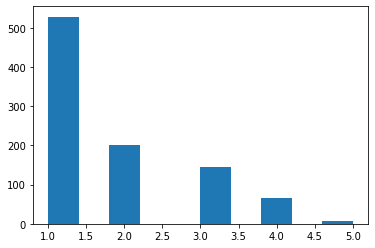

In [13]:
plt.hist(list(cnt.values()))

In [15]:
comm_words = [k for k, v in cnt.items() if v > 4]


In [16]:
# dic = {k: [i for i in v if i[0] not in comm_words] for k, v in dic.items()}
# {k: len(i) for k, i in dic.items()}

In [13]:
with open('/hy-nas/LOTClass/datasets/agnews/cate_vocab_with_weight.pkl', 'wb') as fout:
    pkl.dump(dic, fout)

In [ ]:
# 过滤common词

# comm_words = set(map(lambda x: x[0], dic['good'])).intersection(map(lambda x: x[0], dic['bad']))
# comm_words

In [5]:
dic_ids = {}
i = 0
for k, v in dic.items():
#     dic_ids.setdefault(i, [])
    dic_ids[i] = np.array([item for item in tker.convert_tokens_to_ids([item[0] for item in dic[k]]) if item != 100])
#     dic_ids[i] = np.array([item for item in tker.convert_tokens_to_ids(dic[k]) if item != 100])
    i += 1
dic_ids

{0: array([ 6980,  5073,  2806,  4177,  2954,  2082,  5081,  5353,  2994,
         3433,  4433,  3535,  5210,  2617, 17419, 12060, 11703, 12665,
         8499,  9560,  6883,  8090, 13463,  7982,  4480,  4390,  3059,
         4105,  2171,  3510, 13136, 10340,  4847,  9452,  4357,  2731,
         5499,  9634,  2847, 10130,  3942, 15739,  4035,  9838,  3304,
         3087,  5924,  4924,  4037, 17930,  2704,  2795,  5981,  3323,
         2372,  6056, 16579,  9245,  2393,  5464, 20312, 21240,  4650,
        11433,  3049,  4018,  7195,  4959,  3371,  6778,  2616,  9719,
        15984,  7776,  4675,  2607,  9824,  5152, 13446,  6438,  6256,
        10913,  2343,  2801,  3311, 19006, 28337,  6859,  2809, 15335,
        10457,  7269]),
 1: array([11081,  2476,  9175,  7181,  7808,  5135, 13581,  2873, 17525,
         2267,  3346,  3455,  2374,  4599, 15426,  5803,  6452,  2528,
        10289,  2252, 10981,  6548,  2136,  2867, 18038,  4605,  9938,
        16181,  3692, 13468,  4184,  3598,  885

In [9]:
# [item for item in tker.convert_tokens_to_ids([item[0] for item in dic['sports']]) if item != 100]

In [17]:
{k: len(i) for k, i in dic_ids.items()}

{0: 266,
 1: 300,
 2: 296,
 3: 105,
 4: 193,
 5: 161,
 6: 178,
 7: 297,
 8: 52,
 9: 193,
 10: 298,
 11: 237,
 12: 217,
 13: 292}

In [140]:
# torch.save(dic_ids, 'category_vocab.pt.bak_o')

In [18]:
torch.save(dic_ids, '/hy-tmp/LOTClass/datasets/dbpedia/category_vocab.pt.bak_o')
torch.save(dic_ids, '/hy-tmp/LOTClass/datasets/dbpedia/category_vocab.pt')

In [59]:
with open('datasets/agnews/train.txt', 'r') as fin:
    text = fin.readlines()

In [62]:
from tqdm import tqdm
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

text = [remove_urls(item) for item in tqdm(text)]
text = [re.sub(r'[^\w\s]',' ', item) for item in tqdm(text)]


100%|██████████| 120000/120000 [00:01<00:00, 84762.74it/s]

100%|██████████| 120000/120000 [00:00<00:00, 158611.90it/s]


In [ ]:
for d in tqdm(data):
    d = [i.lower() for i in d.split(' ')]
    if len(govs.intersection(d)) > 0:
        print(govs.intersection(d))

In [68]:
from nltk.corpus import wordnet

wordnet.synsets('nba')

[]

In [79]:
import nltk
pos_tags = nltk.pos_tag('beijing is a building in china'.split())

In [80]:
pos_tags

[('beijing', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('building', 'NN'),
 ('in', 'IN'),
 ('china', 'NN')]

In [81]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
wnl.lemmatize('located', 'n')

'located'